In [1]:
#Importing Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns

In [2]:
#Loading the dataset
car_data = pd.read_csv('car.csv', names = ['Buying_Price', 'Maintenance_Price',
                                           'Number_Of_Doors', 'Number_Of_Persons',
                                           'Boot_Size', 'Safety', 'Acceptability'])

In [3]:
#Exploring the data
#Viewing the table
car_data

,Buying_Price,Maintenance_Price,Number_Of_Doors,Number_Of_Persons,Boot_Size,Safety,Acceptability
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [4]:
#Checking the information of the data
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Buying_Price       1728 non-null   object
 1   Maintenance_Price  1728 non-null   object
 2   Number_Of_Doors    1728 non-null   object
 3   Number_Of_Persons  1728 non-null   object
 4   Boot_Size          1728 non-null   object
 5   Safety             1728 non-null   object
 6   Acceptability      1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [5]:
#checking the shape of the data
car_data.shape

(1728, 7)

In [6]:
car_data.describe()

,Buying_Price,Maintenance_Price,Number_Of_Doors,Number_Of_Persons,Boot_Size,Safety,Acceptability
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,2,2,small,low,unacc
freq,432,432,432,576,576,576,1210


In [7]:
#Checking for null values
car_data.isnull().any()

Buying_Price         False
Maintenance_Price    False
Number_Of_Doors      False
Number_Of_Persons    False
Boot_Size            False
Safety               False
Acceptability        False
dtype: bool

In [8]:
#Checking the number of unique features in the data
for col in car_data:
    print(col, '({})'.format(car_data[col].nunique()), ':')
    print(car_data[col].value_counts())

Buying_Price (4) :
vhigh    432
high     432
med      432
low      432
Name: Buying_Price, dtype: int64
Maintenance_Price (4) :
vhigh    432
high     432
med      432
low      432
Name: Maintenance_Price, dtype: int64
Number_Of_Doors (4) :
2        432
3        432
4        432
5more    432
Name: Number_Of_Doors, dtype: int64
Number_Of_Persons (3) :
2       576
4       576
more    576
Name: Number_Of_Persons, dtype: int64
Boot_Size (3) :
small    576
med      576
big      576
Name: Boot_Size, dtype: int64
Safety (3) :
low     576
med     576
high    576
Name: Safety, dtype: int64
Acceptability (4) :
unacc    1210
acc       384
good       69
vgood      65
Name: Acceptability, dtype: int64


graph for Buying_Price: total - 4


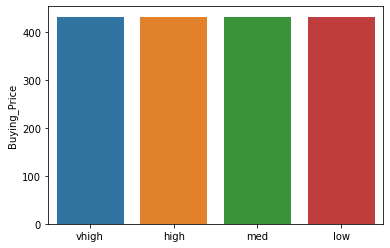

graph for Maintenance_Price: total - 4


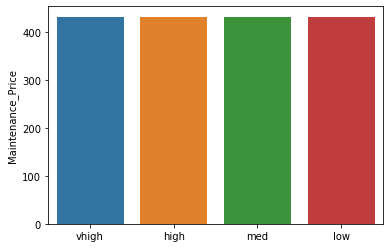

graph for Number_Of_Doors: total - 4


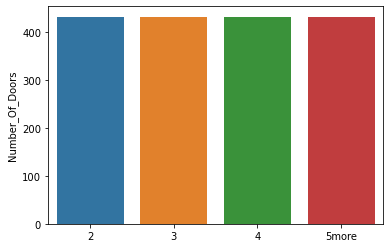

graph for Number_Of_Persons: total - 3


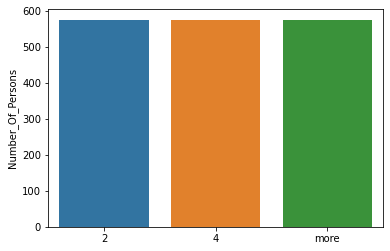

graph for Boot_Size: total - 3


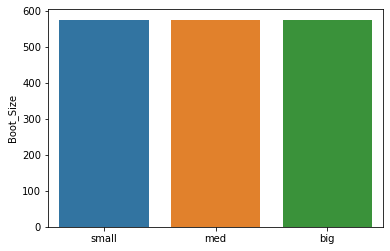

graph for Safety: total - 3


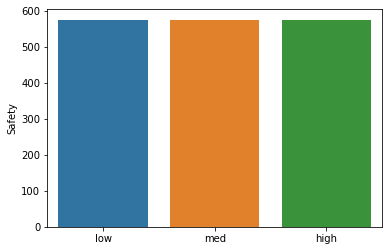

graph for Acceptability: total - 4


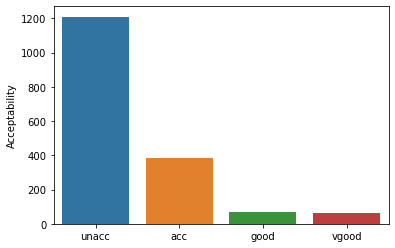

In [9]:
#Visualizing the different features
for i in car_data:
    car_num = car_data[i].value_counts()
    print('graph for %s: total - %d' % (i, len(car_num)))
    chart = sns.barplot(x=car_num.index, y=car_num)
    chart.set_xticklabels(chart.get_xticklabels())
    plt.show()

In [10]:
car_dataEnc = car_data
car_dataEnc['Acceptability'] = car_data['Acceptability'].replace(['unacc', 'acc', 'good', 'vgood'], [0,1,2,3])
car_dataEnc['Buying_Price'] = car_data['Buying_Price'].replace(['vhigh', 'high', 'med', 'low'], [3,2,1,0])
car_dataEnc['Maintenance_Price'] = car_data['Maintenance_Price'].replace(['vhigh', 'high', 'med', 'low'], [3,2,1,0])
car_dataEnc['Number_Of_Doors'] = car_data['Number_Of_Doors'].replace(['2', '3', '4', '5more'], [0,1,2,3])
car_dataEnc['Number_Of_Persons'] = car_data['Number_Of_Persons'].replace(['2', '4', 'more'], [0,1,2])
car_dataEnc['Boot_Size'] = car_data['Boot_Size'].replace(['small', 'med', 'big'], [0,1,2])
car_dataEnc['Safety'] = car_data['Safety'].replace(['low', 'med', 'high'], [0,1,2])

In [11]:
car_dataEnc.head()

,Buying_Price,Maintenance_Price,Number_Of_Doors,Number_Of_Persons,Boot_Size,Safety,Acceptability
0,3,3,0,0,0,0,0
1,3,3,0,0,0,1,0
2,3,3,0,0,0,2,0
3,3,3,0,0,1,0,0
4,3,3,0,0,1,1,0


In [12]:
#Splitting the data into training and testing sets.
from sklearn.model_selection import train_test_split
X = car_dataEnc.drop(['Acceptability'], axis = 1)
y = car_dataEnc['Acceptability']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)

In [13]:
#Training the Model

In [14]:
# Using Decision Tree
from sklearn.tree import DecisionTreeClassifier

carData_dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
carData_dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [15]:
#Predicting the test results
car_pred = carData_dt.predict(X_test)
print(car_pred)

[1 0 0 0 0 2 0 1 2 0 0 0 1 0 0 1 0 0 1 0 2 1 2 0 0 0 0 0 0 0 2 1 0 1 2 0 0
 0 0 0 0 0 0 0 3 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 1
 2 1 0 1 1 0 1 1 1 0 0 0 0 2 0 0 0 1 0 0 0 3 0 1 1 0 0 0 1 0 3 1 0 1 0 0 0
 0 0 1 0 2 1 0 0 0 0 0 1 0 0 0 0 1 2 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0
 1 1 1 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 1
 0 2 0 0 0 0 1 0 0 0 1 0 2 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1
 0 3 0 0 0 3 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 2 0 1 0 0 0 0 0 2 1 2 1 1 0 0
 0 1 0 0 1 0 0 3 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 3 2 0 0 0 0 0 0 0
 0 0 0 1 0 1 1 2 2 0 1 0 1 0 2 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 2
 0 2 0 0 0 3 0 0 3 0 1 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0 1 0 0 2 3 1 1 0 3
 0 0 0 1 0 0 0 1 0 1 2 0 2 0 0 0 1 0 0 0 0 0 0 3 0 0 1 0 0 1 0 1 0 0 3 0 0
 0 0 1 0 0 0 0 0 0 1 1 0 1 0 2 3 0 0 0 3 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0
 0 0 1 1 0 0 0 0 0 0 0 0 

In [16]:
print(y_test)

1318    0
124     0
648     0
249     0
1599    0
       ..
906     0
309     0
838     0
1076    1
1453    1
Name: Acceptability, Length: 519, dtype: int64


In [17]:
# To evaluate performance of the model

from sklearn import metrics
acc = metrics.accuracy_score(y_test, car_pred)
print('accuracy:%2f\n\n'%(acc))
cm = metrics.confusion_matrix(y_test, car_pred)
print('Confusion Matrix:')
print(cm,'\n\n')
print('-----------------------------')
result = metrics.classification_report(y_test, car_pred)
print('Classification Report:\n')
print(result)

accuracy:0.982659


Confusion Matrix:
[[362   1   0   0]
 [  2 109   4   0]
 [  0   1  24   0]
 [  0   1   0  15]] 


-----------------------------
Classification Report:

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       363
           1       0.97      0.95      0.96       115
           2       0.86      0.96      0.91        25
           3       1.00      0.94      0.97        16

    accuracy                           0.98       519
   macro avg       0.96      0.96      0.96       519
weighted avg       0.98      0.98      0.98       519



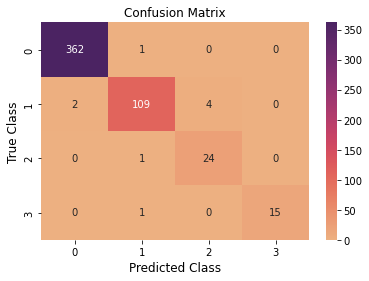

In [18]:
#Heat map visualization
ax =sns.heatmap(cm, cmap='flare',annot=True, fmt='d')

plt.xlabel('Predicted Class', fontsize = 12)
plt.ylabel('True Class', fontsize=12)
plt.title('Confusion Matrix', fontsize=12)

plt.show()

In [19]:
#Visualizing the Decision tree

In [20]:
!pip3 install graphviz
!pip3 install pydotplus

In [21]:
conda install python-graphviz

Retrieving notices: ...working... done
Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


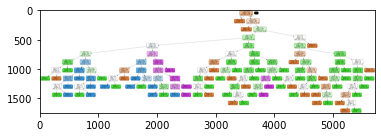

In [22]:
from sklearn import tree
import pydotplus
import graphviz 
from graphviz import Source


dot_data=tree.export_graphviz(carData_dt,filled=True,rounded=True)
graph=pydotplus.graph_from_dot_data(dot_data)
graph.write_png('tree.png')  

plt.imshow(plt.imread('tree.png'))

In [23]:
dot_data = tree.export_graphviz(carData_dt, out_file=None, feature_names=X.columns)
graph = graphviz.Source(dot_data) 
graph.render("name of file",view = True)


'name of file.pdf'